In [9]:
#Image Search API
from duckduckgo_search import DDGS

#Provides Utils classes 
from fastcore.all import *

#Downloading URLs
from fastdownload import download_url

#FastAI Vision
from fastai.vision.all import *

import os

In [ ]:
#Search for images using the Duckduckgo imagesearch API
def search_images(term, max_images=200): 
    return L(DDGS().images(term, max_results=max_images)).itemgot('image')

In [14]:
#Search and save the urls 
urls = search_images('brown bear', max_images=1)
urls[0]

'https://upload.wikimedia.org/wikipedia/commons/2/2a/Brown_bear_(Ursus_arctos_arctos)_running.jpg'

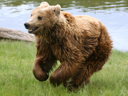

In [15]:
#download the images from the URLs

dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=True)

#Preview image while resizing
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
bear_types = ['black','brown','teddy']
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir
        